# CS4487 Machine Learning | City University of Hong Kong
## Group Assignment - until 2019.12.13
- Tim Löhr       , EID: 40126684 
- Timo Bohnstedt , EID:
- Karina         , EID:

## 1.0 - Preprocessing

In [1]:
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import genfromtxt
from keras import regularizers
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import load_model
from keras.models import Model
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from IPython.display import Image
%matplotlib inline

Using TensorFlow backend.


In [2]:
# cifar10 category label name
cifar10_labels = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

### 1.1 - Load the dataset and set the labels

In [4]:
# get data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_pred = np.load("y_test.npy")

### 1.2 - Visualize the first 20 images

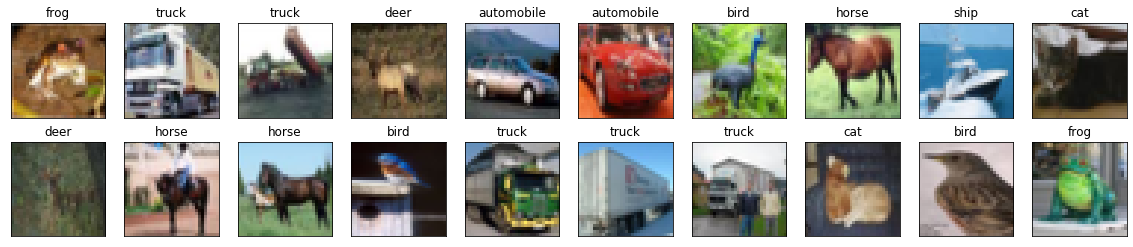

In [5]:
# show imgs
fig = plt.figure(figsize=(20, 4))

for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    plt.imshow(x_train[:20][i], cmap='gray')
    ax.set_title(cifar10_labels[y_train[:20][i].item()])

### 1.3 - Data Z-Score transformation

In [6]:
#normalization with z score
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_pred = x_pred.astype('float32')

mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
x_pred = (x_pred-mean)/(std+1e-7)

print("X_train: " + str(x_train.shape))
print("y_train: " + str(y_train.shape))
print()
print("X_test: " + str(x_test.shape))
print("y_test: " + str(y_test.shape))

X_train: (50000, 32, 32, 3)
y_train: (50000, 1)

X_test: (10000, 32, 32, 3)
y_test: (10000, 1)


In [7]:
# output vector in a matrix with binary signal values 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

### 1.4 - Predefined Functions

In [8]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [9]:
# functions
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [10]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

## 2.0 - Model
### 2.1 - VGG MOdel

In [11]:
# define model
weight_decay = 1e-4
datagen.fit(x_train)
model = Sequential()
       
    
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:],kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### 2.2 - VGG Model Summary

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)       

## 3.0 - Training
### 3.1 - Load the trained model if it exists, else train the model

In [14]:
# load or train model
exists = os.path.isfile('models/model_92.h5')
if exists:
    print('Load model...')
    #with open('model.json', 'r') as f:
      #  model = model_from_json(f.read())
    model.load_weights('models/model_92.h5')
    opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
    print('Model loaded succesfully')
else:   
    print('Train model...')
    batch_size = 64
    opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                        steps_per_epoch=x_train.shape[0] // batch_size, epochs=125,\
                        verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])   
    model_json = model.to_json()
    with open('models/model_92.json', 'w') as json_file:
        json_file.write(model_json)
    model.save_weights('models/model_92.h5')
    print('Model saved successfully')

Load model...
Model loaded succesfully


### 3.2 - Evaluate the Test accuracy and loss

In [ ]:
#Evaluate    
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128, verbose=1) 
test_loss = round(test_loss,2)
test_acc = round(test_acc,2)
print('The Test acc from our model is {:.2f}% and Loss of {}'.format(test_acc*100, test_loss))

In [ ]:
plothist(history)

## 4.0 - Predict 12000 Image Dataset
### 4.1 Save results to CSV and print the head

In [16]:
# Predict
header = 'Index,Category'

try:
    result = pd.read_csv('results.csv')
    result.head()
    print('Results loaded successfully')
except:
    y_pred = model.predict(x_pred, batch_size=128, verbose=1)
    y_pred_results = [np.argmax(x) for x in y_pred]
    print('Predict Test Data')
    np.savetxt('results.csv',np.column_stack((np.arange(0,12000), y_pred_results)), 
               delimiter=',', fmt='%s',header=header,comments='')
    print('Saved results.csv successfully')

Results loaded successfully


### 4.2 - Visualize the validation images with the predicted labels

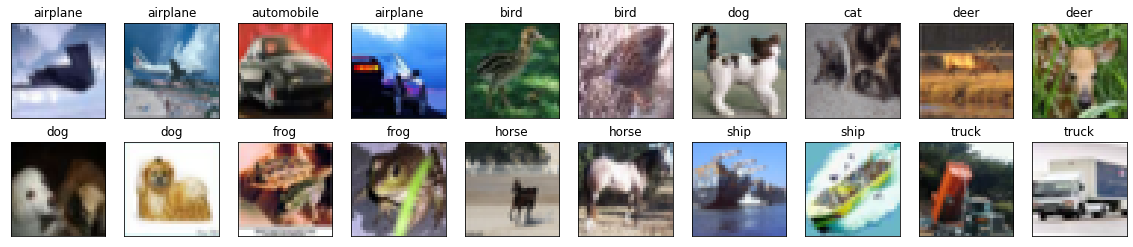

In [18]:
# show imgs
x_val = np.load("y_test.npy")

fig = plt.figure(figsize=(20, 4))

for i in np.arange(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    plt.imshow(x_val[:2000:100][i], cmap='gray')
    ax.set_title(cifar10_labels[y_pred_results[:2000:100][i].item()])

## 5.0 Feature Map
### 5.1 - Model CNN Layers with Index

In [19]:
# layer names and the shape of the feature maps in the layer.
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' in layer.name:
        print(i+1, layer.name, layer.output.shape)

1 conv2d_1 (None, 32, 32, 64)
5 conv2d_2 (None, 32, 32, 64)
9 conv2d_3 (None, 16, 16, 128)
13 conv2d_4 (None, 16, 16, 128)
17 conv2d_5 (None, 8, 8, 256)
21 conv2d_6 (None, 8, 8, 256)
25 conv2d_7 (None, 8, 8, 256)
29 conv2d_8 (None, 4, 4, 512)
33 conv2d_9 (None, 4, 4, 512)
37 conv2d_10 (None, 4, 4, 512)
41 conv2d_11 (None, 2, 2, 512)
45 conv2d_12 (None, 2, 2, 512)
49 conv2d_13 (None, 2, 2, 512)


### 5.2 - All Feature Maps of the VGG Network 


-----   Feature Map for Convolutional Layer 1   -----


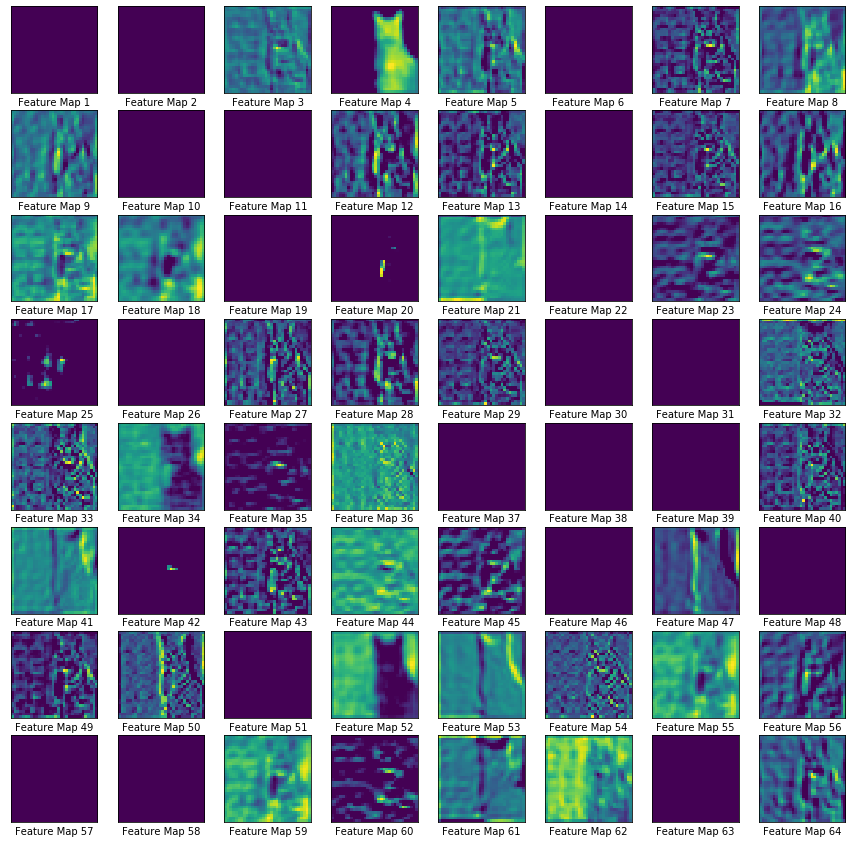


-----   Feature Map for Convolutional Layer 5   -----


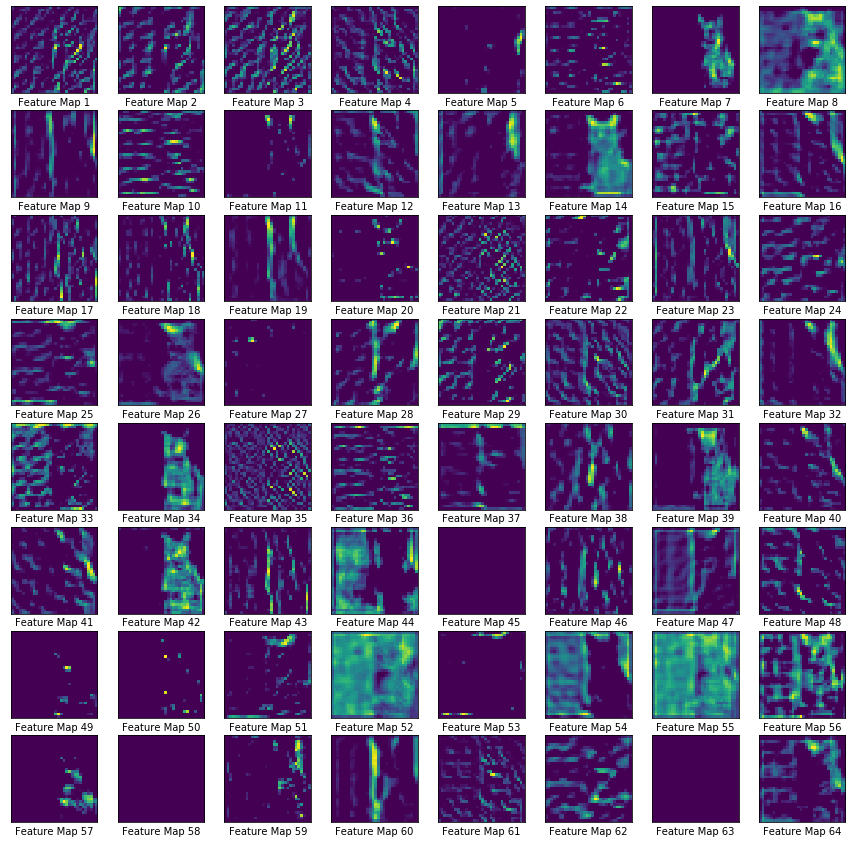


-----   Feature Map for Convolutional Layer 9   -----


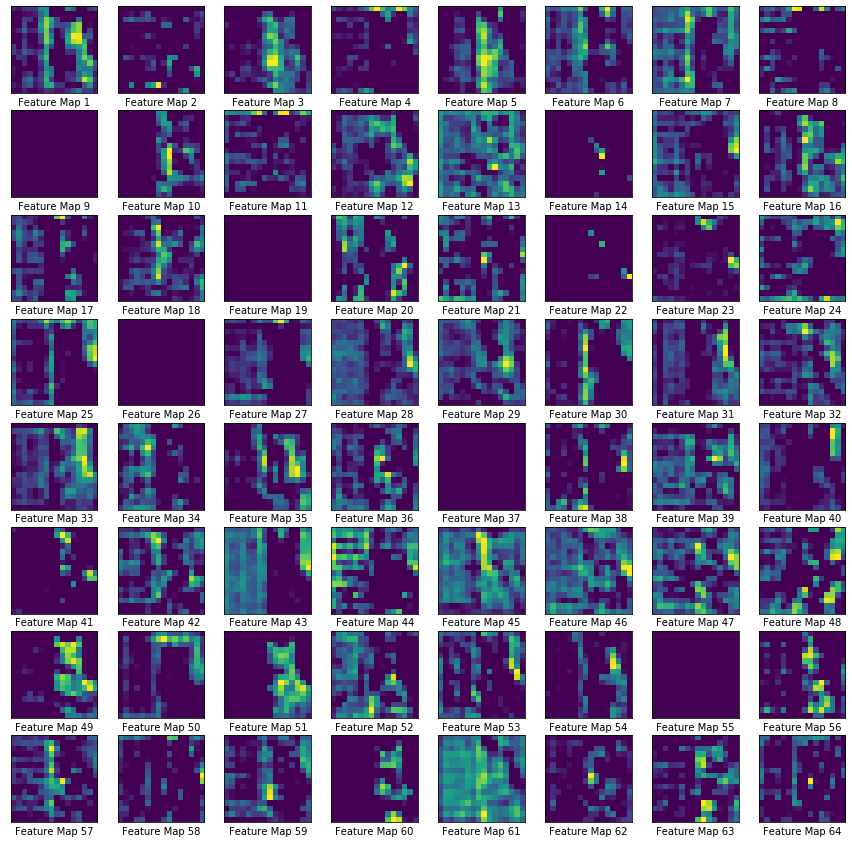


-----   Feature Map for Convolutional Layer 13   -----


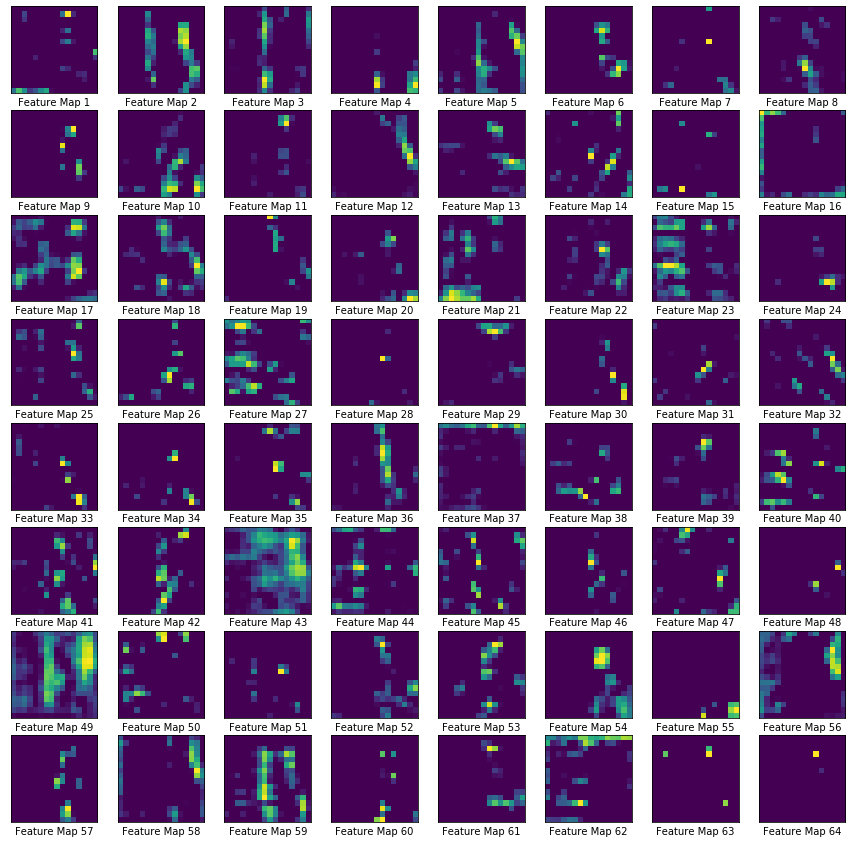


-----   Feature Map for Convolutional Layer 17   -----


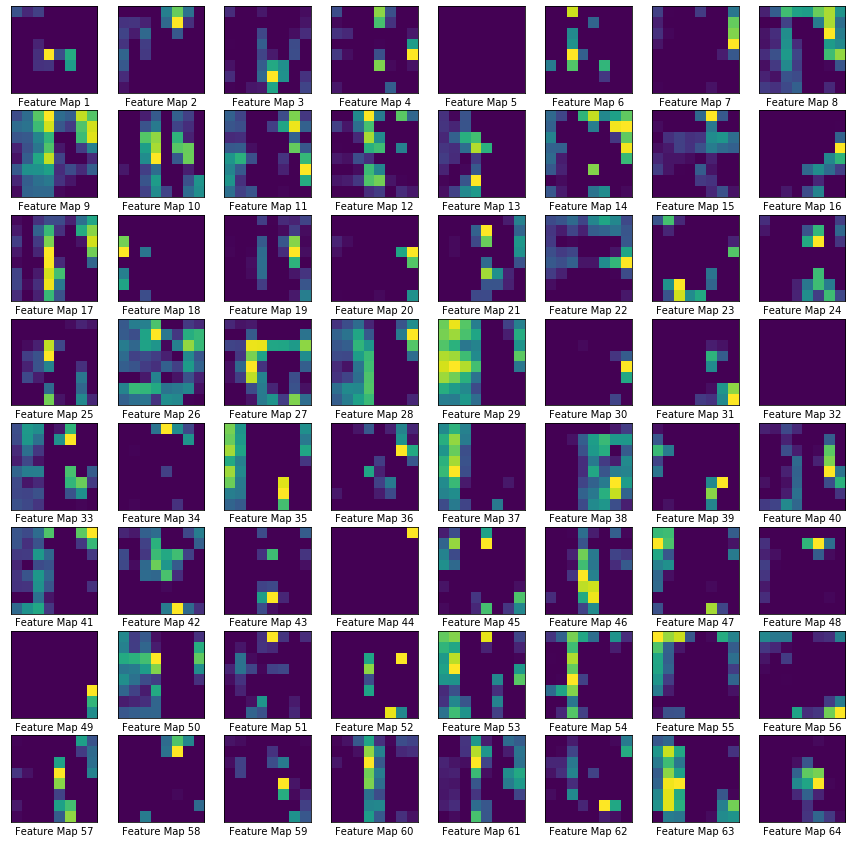


-----   Feature Map for Convolutional Layer 21   -----


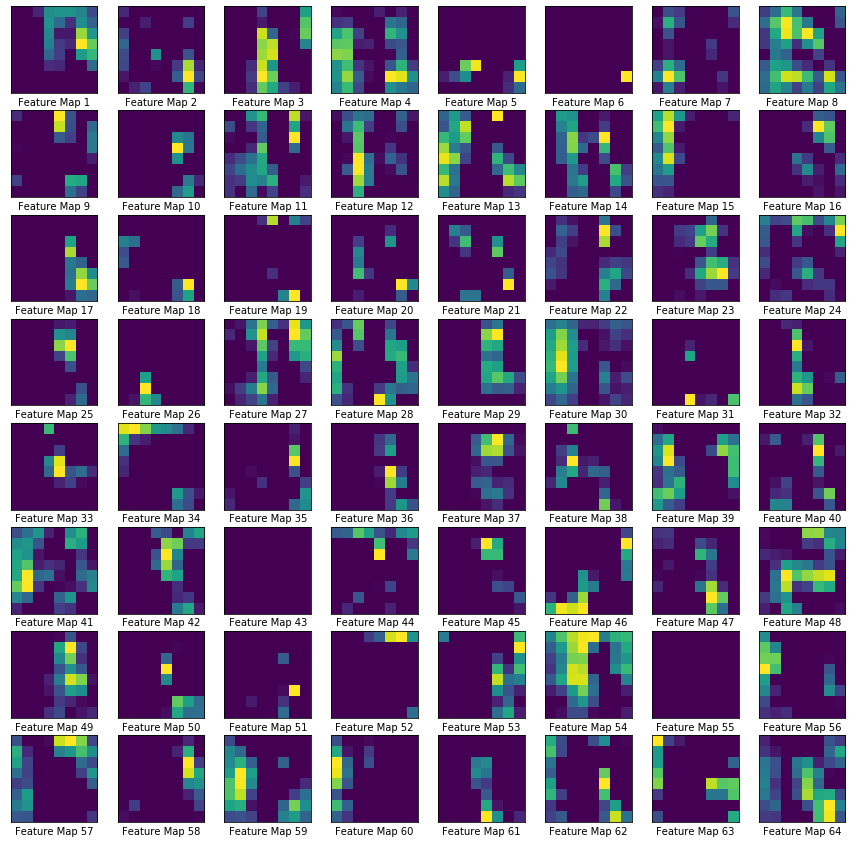


-----   Feature Map for Convolutional Layer 25   -----


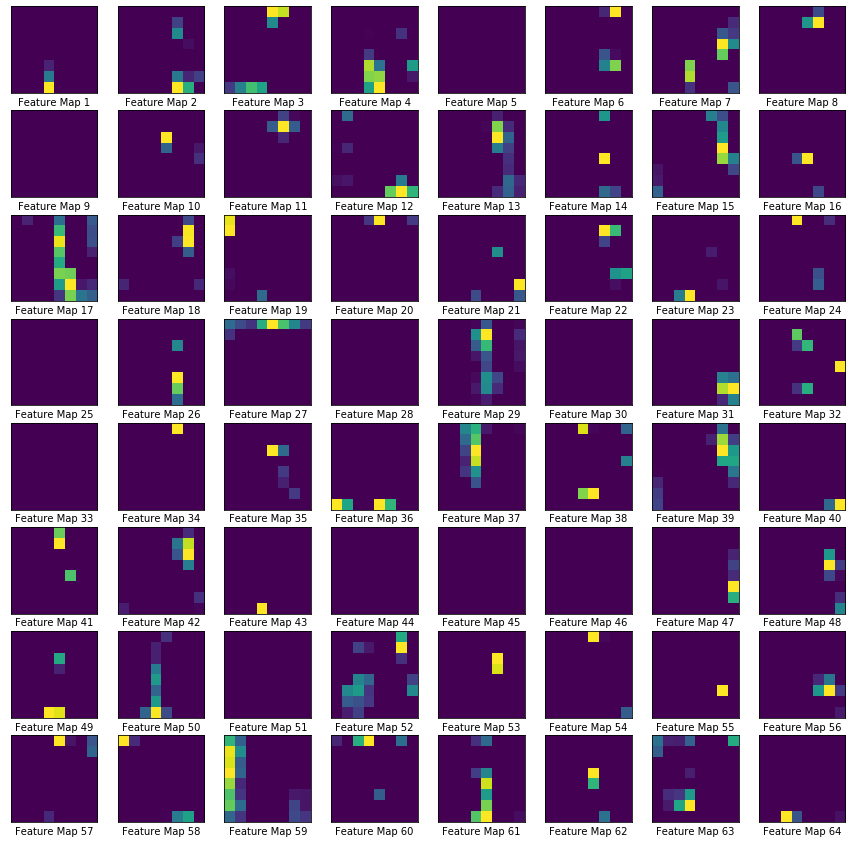


-----   Feature Map for Convolutional Layer 29   -----


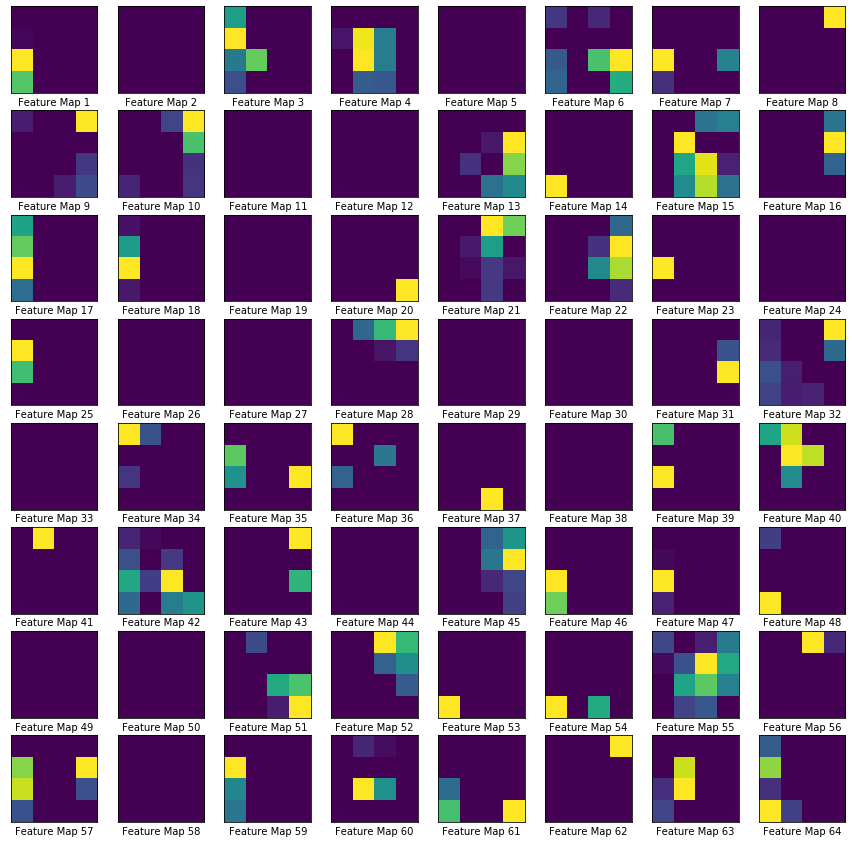


-----   Feature Map for Convolutional Layer 33   -----


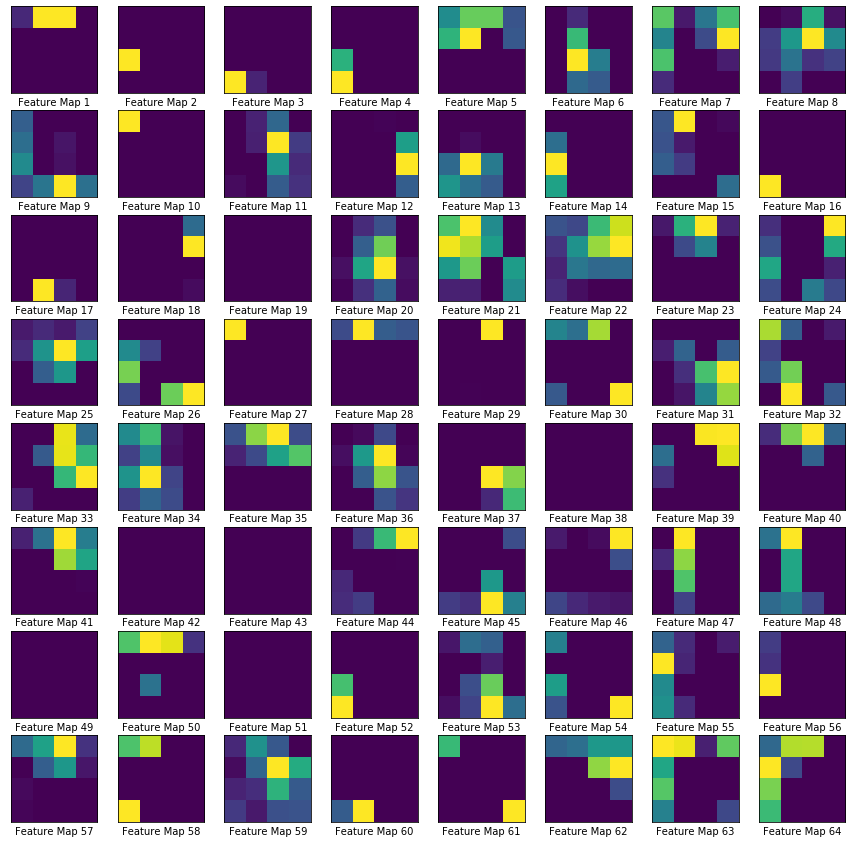


-----   Feature Map for Convolutional Layer 37   -----


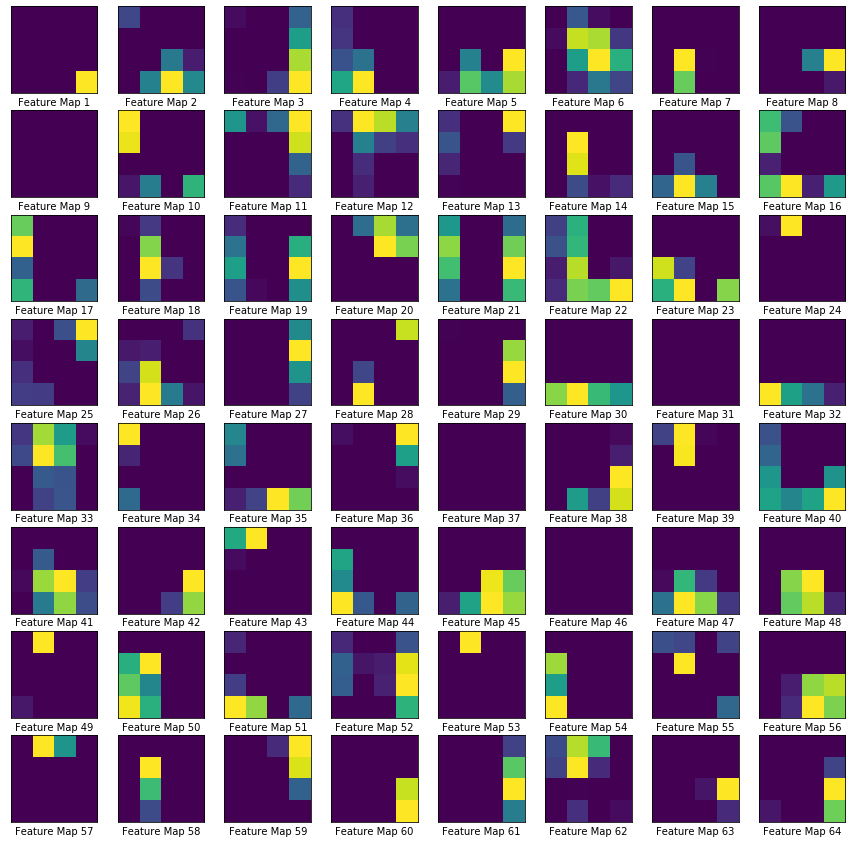


-----   Feature Map for Convolutional Layer 41   -----


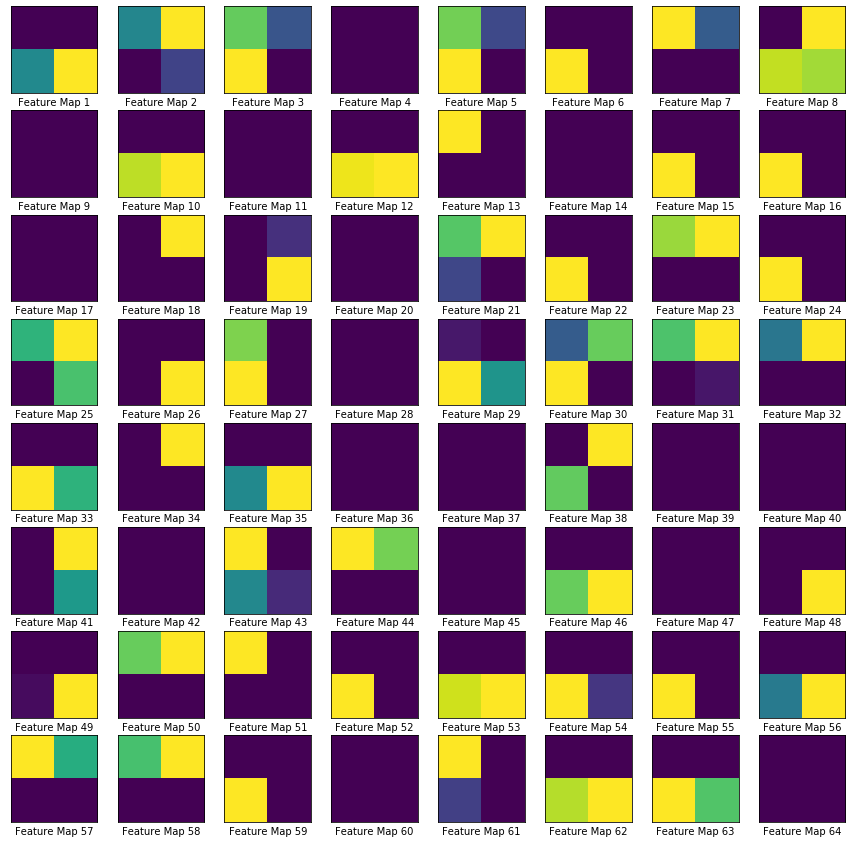


-----   Feature Map for Convolutional Layer 45   -----


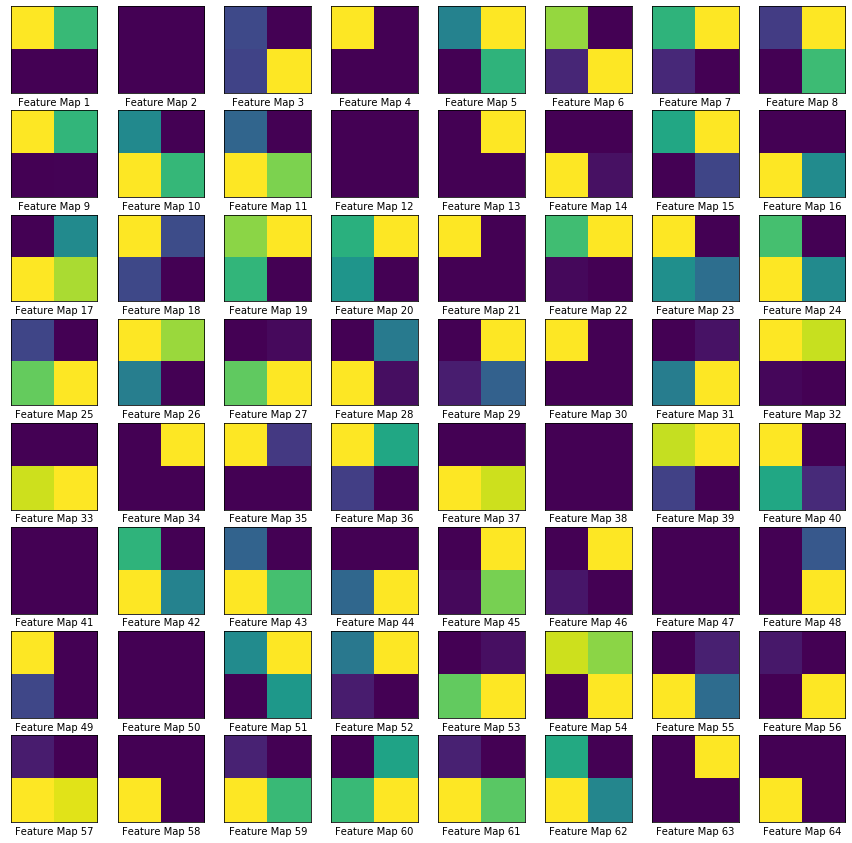


-----   Feature Map for Convolutional Layer 49   -----


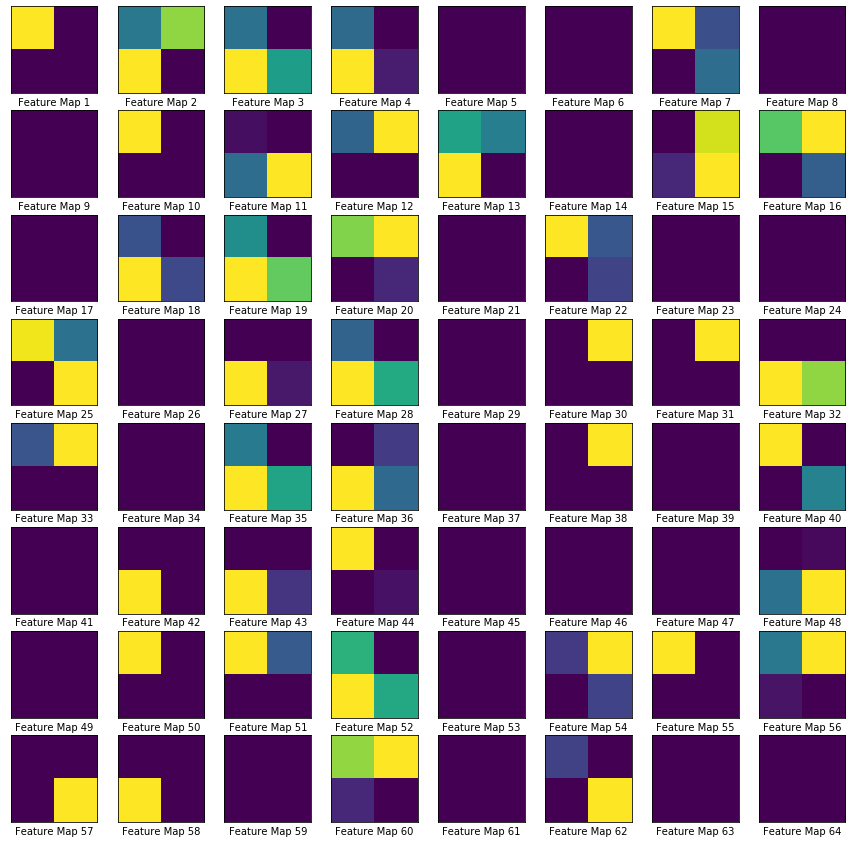

In [20]:
# visualize the feature maps
#model = Model(inputs=model.inputs, outputs=model.layers[1].output)

square = 8
ixs = [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49]
img = x_pred[749:750]
j = 0

outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model.predict(img)

for fmap in feature_maps:
    f = plt.figure(figsize=(15,10))
    ix = 1
    print()
    print('-----   Feature Map for Convolutional Layer ' + str(ixs[j]) + "   -----")
    for _ in range(square):
        for _ in range(square):
            ax = plt.subplot(square, square, ix)
            f.set_figheight(15)
            f.set_figwidth(15)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('Feature Map ' + str(ix))
            plt.imshow(fmap[0, :, :, ix-1])
            ix += 1
    j += 1
    plt.show()